## Summary of Insights
- **Mode of Shipment vs On-Time Delivery Rate**:

Shipment modes such as flights demonstrate higher on-time delivery rates due to faster transit times.
Modes like road or ship show lower on-time delivery rates, potentially due to delays caused by infrastructure or environmental factors.

- **Customer Care Calls vs On-Time Delivery Rate**:

A higher number of customer care calls correlates with lower on-time delivery rates, indicating customer dissatisfaction.
Conversely, a lower number of calls corresponds to better performance and timely deliveries.

- **Customer Rating vs On-Time Delivery Rate**:

Higher customer ratings align with better delivery performance, indicating that satisfied customers likely experienced timely service.
Low ratings are associated with delays or poor service quality.

- **Shipment Destination Distance (KM) vs On-Time Delivery Rate**:

Longer distances (e.g., 2100 km) are associated with more delays due to extended transit times and logistical complexities.

- **Product Importance vs On-Time Delivery Rate**:

High-importance products show better on-time delivery rates, indicating prioritization.
Low- and medium-importance products have lower on-time delivery rates, suggesting they are not prioritized as highly.

- **Discount Offered vs On-Time Delivery Rate**:

Products with higher discounts demonstrate better on-time delivery rates, indicating prioritization of these items.

- **Cost of the Product vs On-Time Delivery Rate**:

Products priced below 1600 and above 2500 show lower on-time delivery performance, suggesting the need for better prioritization for these cost categories.

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [223]:
df=pd.read_csv('Train.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Shipment_Destination_Distance(KM),Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233.0,2000,1
1,2,F,Flight,4,5,216,2,low,M,59,3088.0,2000,1
2,3,A,Flight,2,2,183,4,low,M,48,3374.0,2000,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177.0,2000,1
4,5,C,Flight,2,2,184,3,NaN,F,46,2484.0,2000,1


In [224]:
df.shape

(10999, 13)

### Handle NA Values

In [225]:
##checking the types of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 10999 non-null  int64  
 1   Warehouse_block                    10999 non-null  object 
 2   Mode_of_Shipment                   10999 non-null  object 
 3   Customer_care_calls                10999 non-null  int64  
 4   Customer_rating                    10999 non-null  int64  
 5   Cost_of_the_Product                10999 non-null  int64  
 6   Prior_purchases                    10999 non-null  int64  
 7   Product_importance                 10996 non-null  object 
 8   Gender                             10998 non-null  object 
 9   Discount_offered                   10999 non-null  int64  
 10  Weight_in_gms                      10996 non-null  float64
 11  Shipment_Destination_Distance(KM)  10999 non-null  int

In [226]:
## checking the null values
df.isna().sum() 

ID                                   0
Warehouse_block                      0
Mode_of_Shipment                     0
Customer_care_calls                  0
Customer_rating                      0
Cost_of_the_Product                  0
Prior_purchases                      0
Product_importance                   3
Gender                               1
Discount_offered                     0
Weight_in_gms                        3
Shipment_Destination_Distance(KM)    0
Reached.on.Time_Y.N                  0
dtype: int64

In [227]:
df['Weight_in_gms'].describe()

count    10996.000000
mean      3638.329120
std       1663.690105
min       1001.000000
25%       1840.000000
50%       4150.000000
75%       5051.000000
max      34990.000000
Name: Weight_in_gms, dtype: float64

In [228]:
## handling missing values

df['Weight_in_gms'].fillna(df['Weight_in_gms'].mean(), inplace=True)  # Median for numeric
df['Product_importance'].fillna(df['Product_importance'].mode()[0], inplace=True)  # Mode for categorical 
df['Gender'].fillna('Unknown', inplace=True) # filling the null value with unknown for gender feature

df.isna().sum()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10052\789760358.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weight_in_gms'].fillna(df['Weight_in_gms'].mean(), inplace=True)  # Median for numeric
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10052\789760358.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

ID                                   0
Warehouse_block                      0
Mode_of_Shipment                     0
Customer_care_calls                  0
Customer_rating                      0
Cost_of_the_Product                  0
Prior_purchases                      0
Product_importance                   0
Gender                               0
Discount_offered                     0
Weight_in_gms                        0
Shipment_Destination_Distance(KM)    0
Reached.on.Time_Y.N                  0
dtype: int64

In [229]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Shipment_Destination_Distance(KM)', 'Reached.on.Time_Y.N'],
      dtype='object')

In [230]:
data = df.drop(columns=['ID'])
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Shipment_Destination_Distance(KM),Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233.0,2000,1
1,F,Flight,4,5,216,2,low,M,59,3088.0,2000,1
2,A,Flight,2,2,183,4,low,M,48,3374.0,2000,1
3,B,Flight,3,3,176,4,medium,M,10,1177.0,2000,1
4,C,Flight,2,2,184,3,low,F,46,2484.0,2000,1


In [231]:
numeric_columns=data.select_dtypes(['float64','int64']).columns
numeric_columns

Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Shipment_Destination_Distance(KM)', 'Reached.on.Time_Y.N'],
      dtype='object')

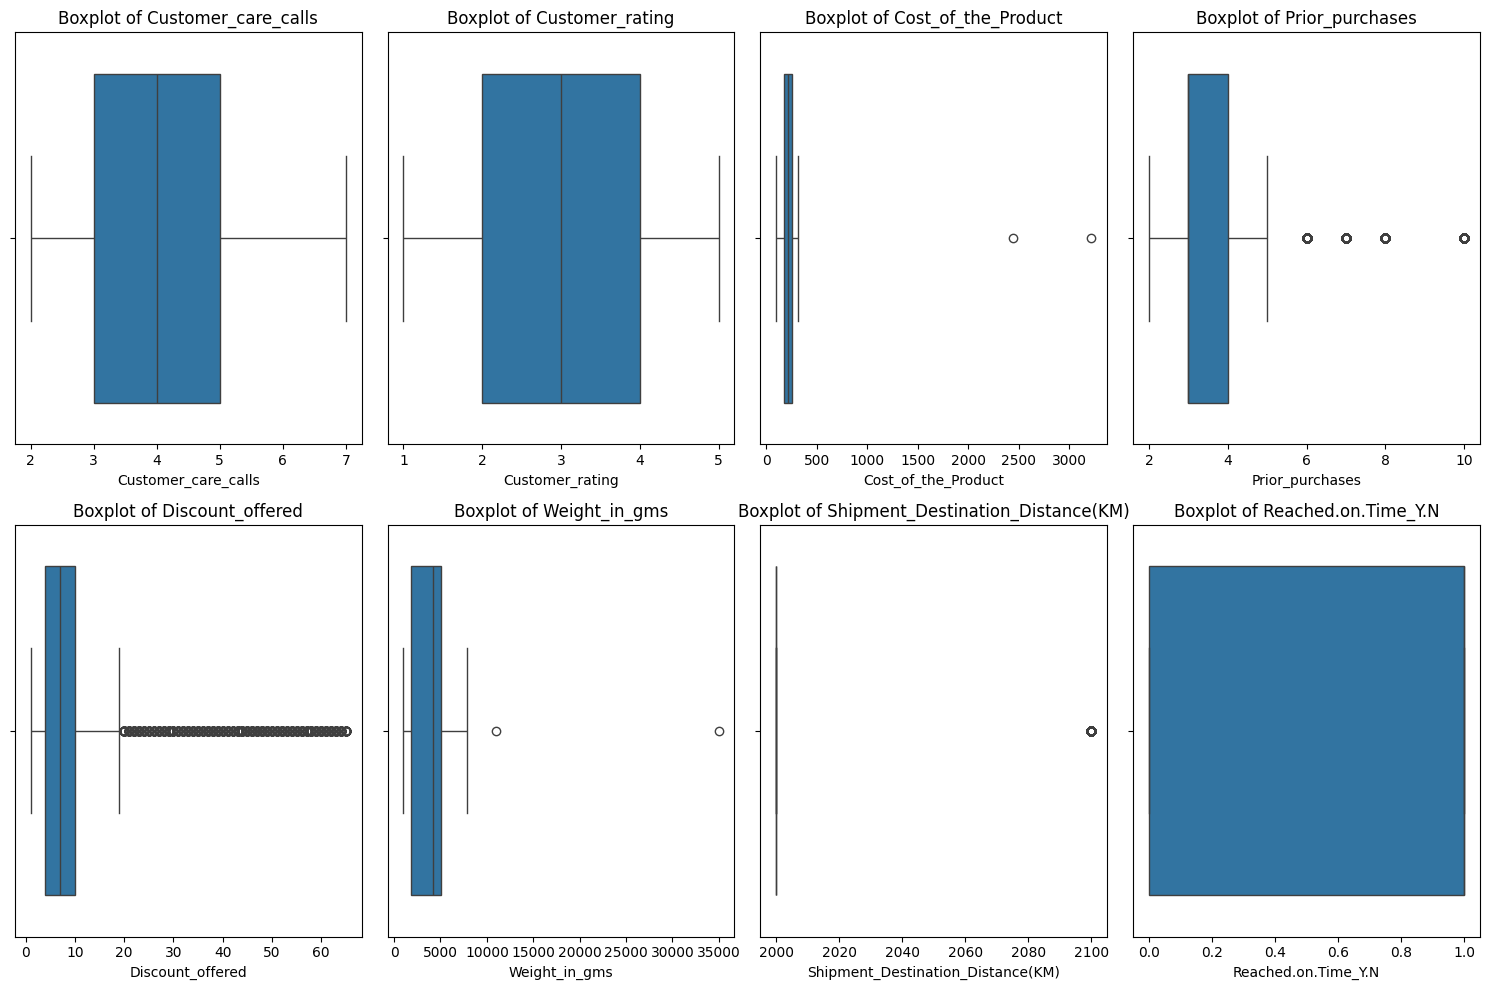

In [232]:
# Create a grid layout for the plots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
axes = axes.flatten()

# Re-load numeric columns (assuming dataset was loaded earlier)
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Plot boxplots for each numeric column in the grid
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=data[column], ax=axes[i])
    axes[i].set_title(f"Boxplot of {column}")

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

In [233]:
data['Discount_offered'].describe()

count    10999.000000
mean        13.373216
std         16.205527
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         65.000000
Name: Discount_offered, dtype: float64

In [234]:
records_above_7_percent = data[data['Discount_offered'] > 7].shape[0]

records_above_7_percent

5153

In [235]:
discount_75th_percentile=data['Discount_offered'].quantile(0.75)
print(discount_75th_percentile)

10.0


In [236]:
data.loc[data['Discount_offered'] > 7, 'Discount_offered'] = discount_75th_percentile

In [237]:
data['Discount_offered'].describe()

count    10999.000000
mean         6.810983
std          3.331315
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         10.000000
Name: Discount_offered, dtype: float64

In [238]:
discount_25th_percentile=data['Discount_offered'].quantile(0.25)
print(discount_25th_percentile)

4.0


In [239]:
data.loc[data['Discount_offered'] < 4, 'Discount_offered'] = discount_25th_percentile

In [240]:
data['Discount_offered'].describe()

count    10999.000000
mean         7.268115
std          2.693643
min          4.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         10.000000
Name: Discount_offered, dtype: float64

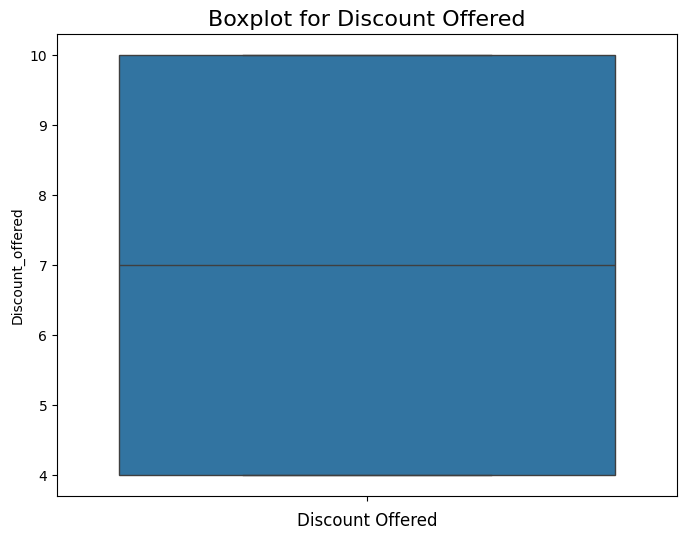

In [241]:
##vizualizing the outliers for discount offered feature
plt.figure(figsize=(8, 6))
sns.boxplot(data['Discount_offered'])
plt.title("Boxplot for Discount Offered", fontsize=16)
plt.xlabel("Discount Offered", fontsize=12)
plt.show()

### Univariate Analysis

In [242]:
numeric_summary = data.describe()
categorical_summary = data.describe(include='object')

In [243]:
numeric_summary

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Shipment_Destination_Distance(KM),Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.669152,3.567597,7.268115,3638.329120,2010.800982,0.596691
std,1.141490,1.413603,59.867887,1.522860,2.693643,1663.463181,31.040692,0.490584
min,2.000000,1.000000,96.000000,2.000000,4.000000,1001.000000,2000.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1840.500000,2000.000000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4150.000000,2000.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5051.000000,2000.000000,1.000000
max,7.000000,5.000000,3219.000000,10.000000,10.000000,34990.000000,2100.000000,1.000000


In [244]:
categorical_summary

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,3
top,F,Ship,low,F
freq,3666,7462,5298,5544


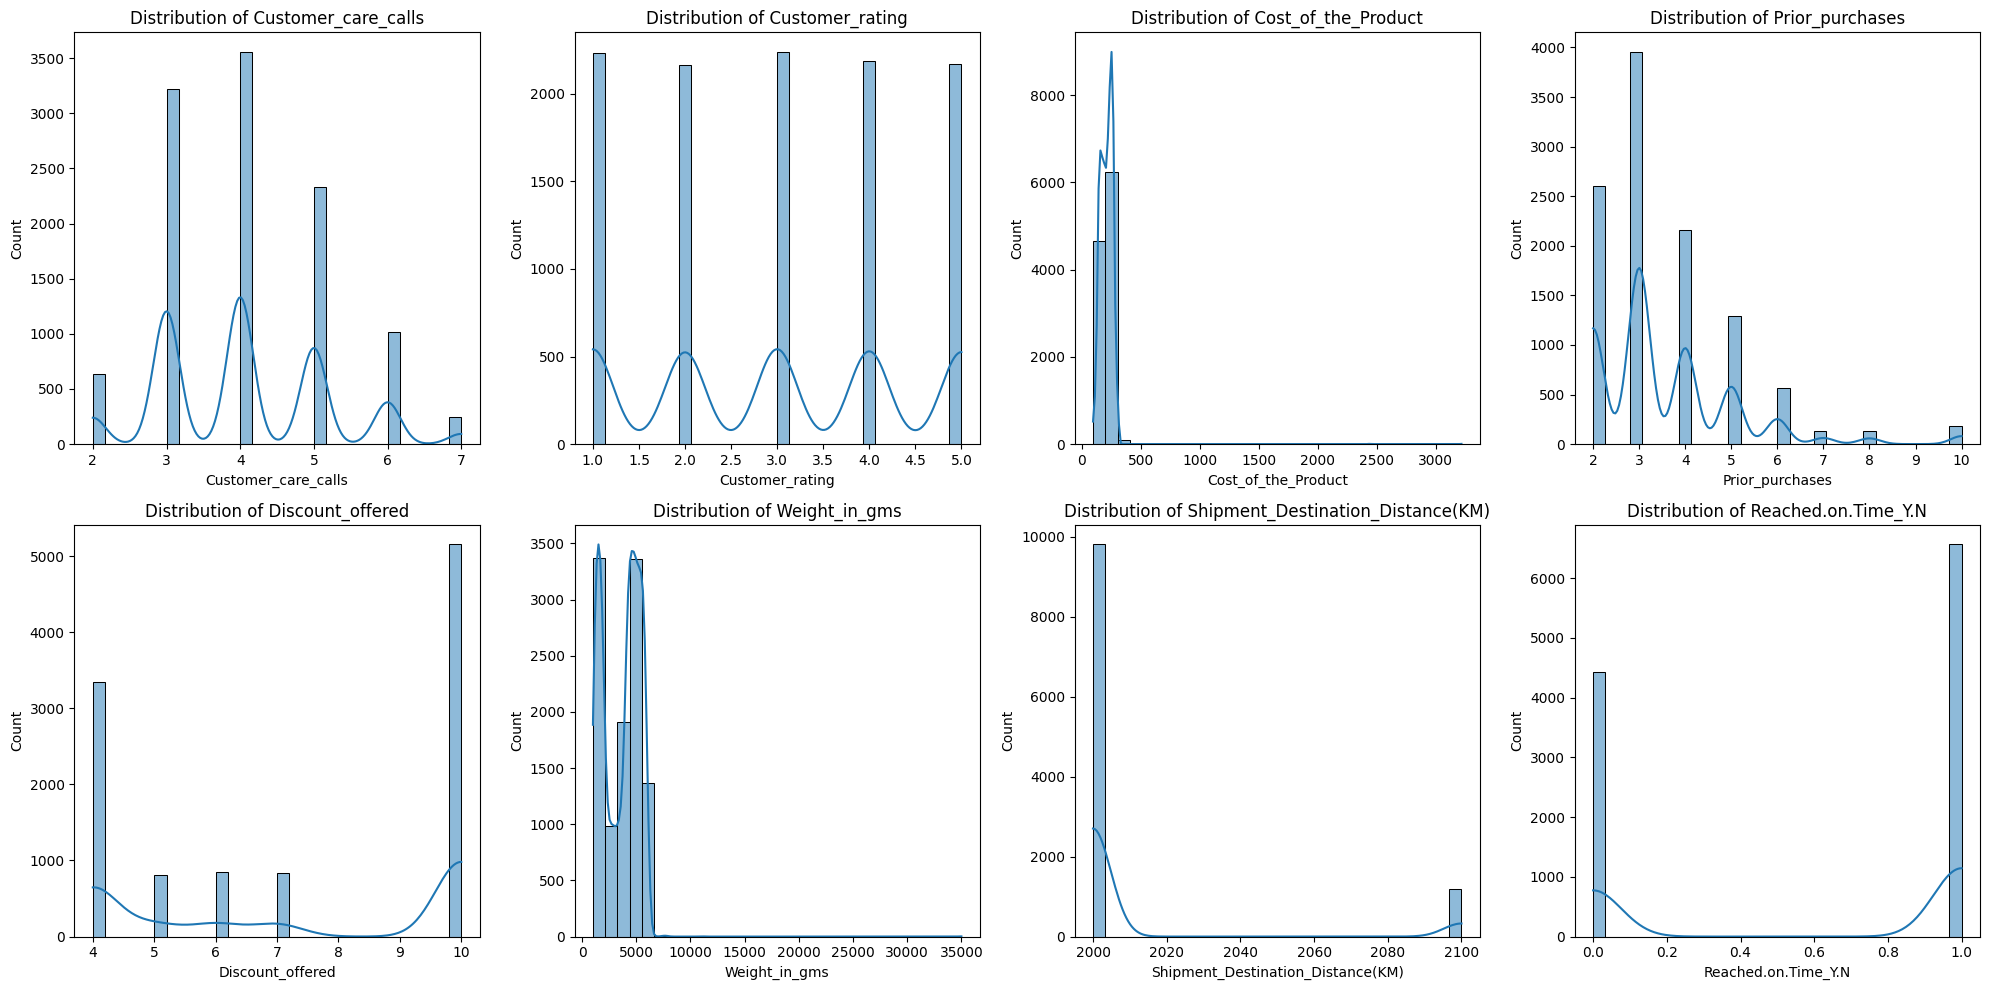

In [245]:
#Distribution plots for numeric features
numeric_columns1 = data.select_dtypes(include=['int64', 'float64']).columns
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for i, column in enumerate(numeric_columns1):
    row, col = divmod(i, 4)  # Determine row and column in the grid
    sns.histplot(data[column], kde=True, bins=30, ax=axes[row, col])
    axes[row, col].set_title(f"Distribution of {column}")

# Adjust layout for better appearance
plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10052\118369261.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette="viridis", ax=axes[idx])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10052\118369261.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette="viridis", ax=axes[idx])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10052\118369261.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette="viridis", ax=axes[idx])
C:\Users\Lenovo\AppData\Local\Temp\ipyke

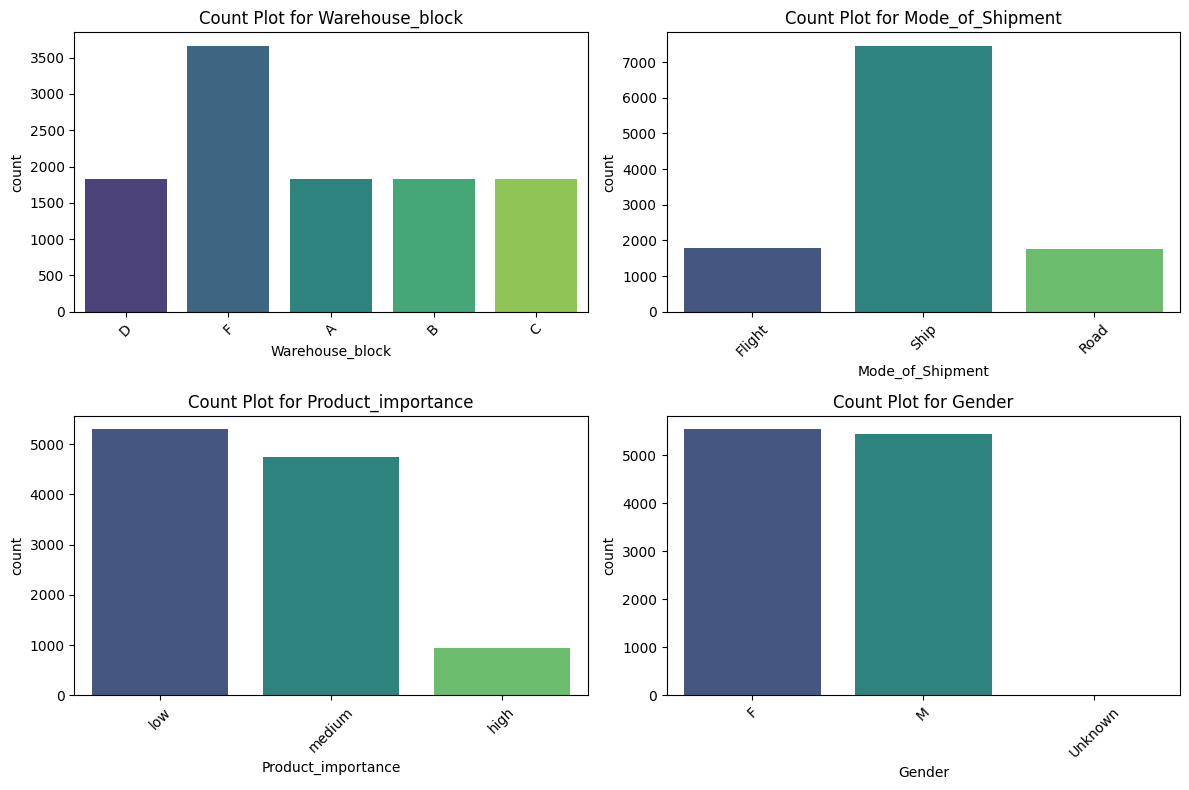

In [246]:
##analysis categorical features
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns layout
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate over

for idx, column in enumerate(categorical_summary):
    if idx < 4:  # To handle cases where there are more than 4 columns
        sns.countplot(data=data, x=column, palette="viridis", ax=axes[idx])
        axes[idx].set_title(f"Count Plot for {column}")
        axes[idx].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Bivariate analysis

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10052\1509707249.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=variable, y=target_column, data=data, estimator='mean', ci=None, ax=axes[i])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10052\1509707249.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=variable, y=target_column, data=data, estimator='mean', ci=None, ax=axes[i])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10052\1509707249.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=variable, y=target_column, data=data, estimator='mean', ci=None, ax=axes[i])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10052\1509707249.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=variable, y=target_column, data=data, estimator='mean

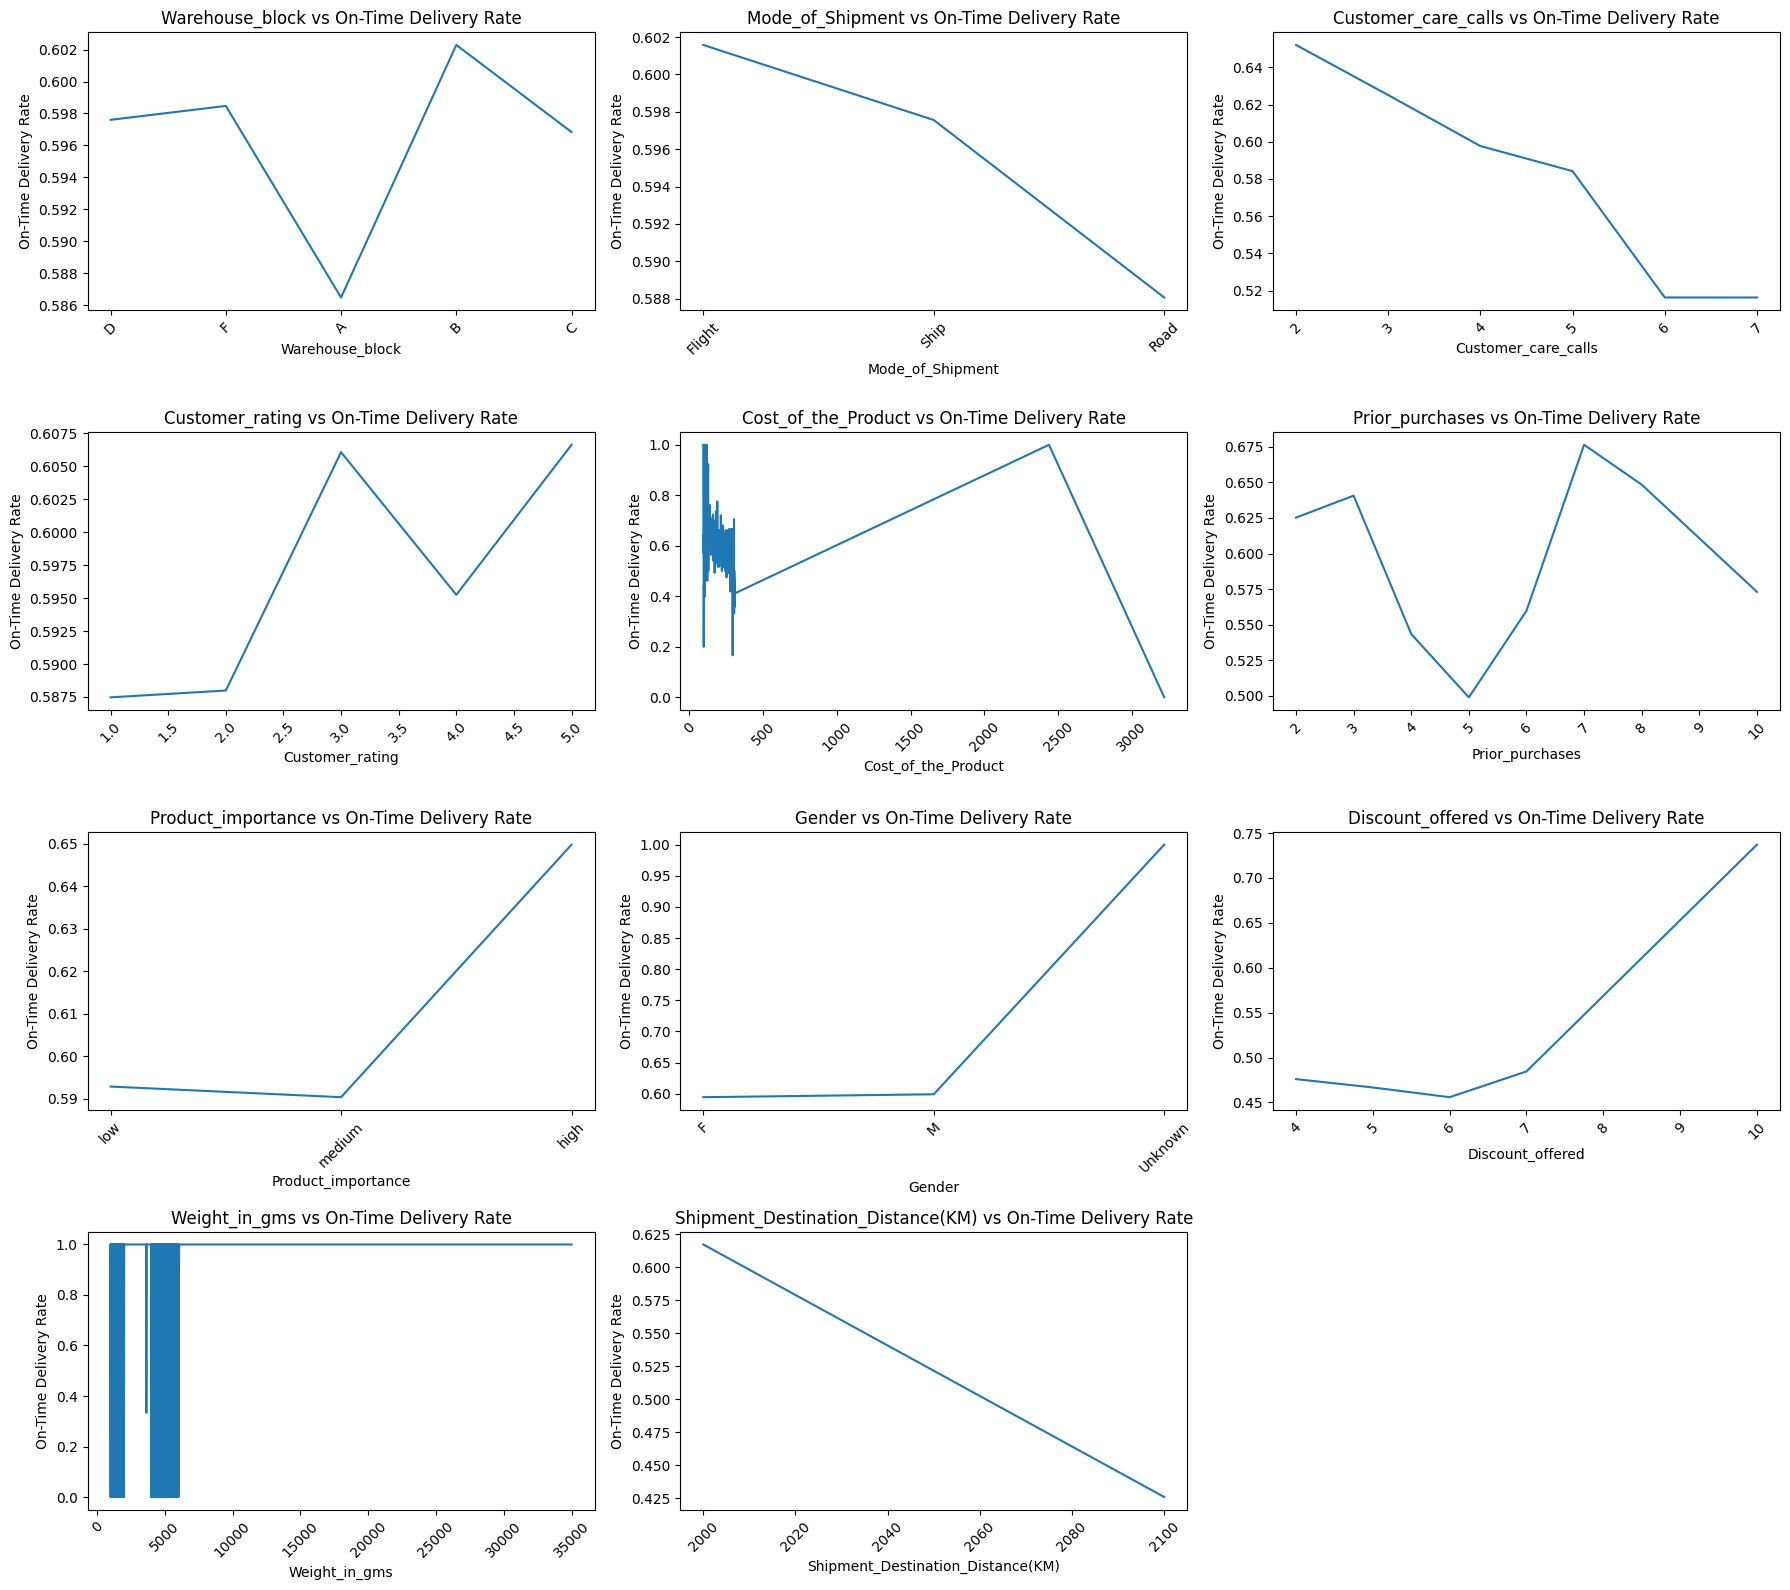

In [247]:
# List of variables for the x-axis
variables = [
    'Warehouse_block',
    'Mode_of_Shipment',
    'Customer_care_calls',
    'Customer_rating',
    'Cost_of_the_Product',
    'Prior_purchases',
    'Product_importance',
    'Gender',
    'Discount_offered',
    'Weight_in_gms',
    'Shipment_Destination_Distance(KM)'
]

# Target column for y-axis
target_column = 'Reached.on.Time_Y.N'

# Number of rows and columns
n_rows = 4  # Adjust for number of variables
n_cols = 3

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 16))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten axes array for easy iteration

# Plot each variable
for i, variable in enumerate(variables):
    sns.lineplot(x=variable, y=target_column, data=data, estimator='mean', ci=None, ax=axes[i])
    axes[i].set_title(f"{variable} vs On-Time Delivery Rate")
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('On-Time Delivery Rate')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

# Hide unused subplots
for j in range(len(variables), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


In [248]:
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Shipment_Destination_Distance(KM),Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,10,1233.0,2000,1
1,F,Flight,4,5,216,2,low,M,10,3088.0,2000,1
2,A,Flight,2,2,183,4,low,M,10,3374.0,2000,1
3,B,Flight,3,3,176,4,medium,M,10,1177.0,2000,1
4,C,Flight,2,2,184,3,low,F,10,2484.0,2000,1


### feature engineering

In [249]:
df=data.copy()
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Shipment_Destination_Distance(KM),Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,10,1233.00000,2000,1
1,F,Flight,4,5,216,2,low,M,10,3088.00000,2000,1
2,A,Flight,2,2,183,4,low,M,10,3374.00000,2000,1
3,B,Flight,3,3,176,4,medium,M,10,1177.00000,2000,1
4,C,Flight,2,2,184,3,low,F,10,2484.00000,2000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,F,4,1538.00000,2100,1
10995,B,Ship,4,1,232,5,medium,F,6,1247.00000,2100,0
10996,C,Ship,5,4,242,5,low,F,4,1155.00000,2100,0
10997,F,Ship,5,2,223,6,medium,M,4,3638.32912,2100,0


In [250]:
df['Product_importance'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [251]:
df['Product_importance'] = df['Product_importance'].map({'low': 1, 'medium': 2, 'high': 3})
df['Product_importance'].unique()

array([1, 2, 3])

In [252]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Shipment_Destination_Distance(KM),Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,1,F,10,1233.0,2000,1
1,F,Flight,4,5,216,2,1,M,10,3088.0,2000,1
2,A,Flight,2,2,183,4,1,M,10,3374.0,2000,1
3,B,Flight,3,3,176,4,2,M,10,1177.0,2000,1
4,C,Flight,2,2,184,3,1,F,10,2484.0,2000,1


In [253]:
df.drop(['Gender'], axis=1,inplace=True)
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Shipment_Destination_Distance(KM),Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,1,10,1233.0,2000,1
1,F,Flight,4,5,216,2,1,10,3088.0,2000,1
2,A,Flight,2,2,183,4,1,10,3374.0,2000,1
3,B,Flight,3,3,176,4,2,10,1177.0,2000,1
4,C,Flight,2,2,184,3,1,10,2484.0,2000,1


In [254]:
df1 = pd.get_dummies(df, columns=['Mode_of_Shipment'], drop_first=True, dtype=int)
df1.head()

,Warehouse_block,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Shipment_Destination_Distance(KM),Reached.on.Time_Y.N,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,D,4,2,177,3,1,10,1233.0,2000,1,0,0
1,F,4,5,216,2,1,10,3088.0,2000,1,0,0
2,A,2,2,183,4,1,10,3374.0,2000,1,0,0
3,B,3,3,176,4,2,10,1177.0,2000,1,0,0
4,C,2,2,184,3,1,10,2484.0,2000,1,0,0


### feature selection

In [255]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Warehouse_block'], df1['Reached.on.Time_Y.N'])

print("Contingency Table:")
print(contingency_table)

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Interpret the result
if p < 0.05:
    print("\nThere is a significant relationship between Warehouse_block and Reached.on.Time_Y.N.")
else:
    print("\nThere is no significant relationship between Warehouse_block and Reached.on.Time_Y.N.")


Contingency Table:
Reached.on.Time_Y.N     0     1
Warehouse_block                
A                     758  1075
B                     729  1104
C                     739  1094
D                     738  1096
F                    1472  2194

Chi-Square Test Results:
Chi-Square Statistic: 1.0893868307263042
P-Value: 0.8959524278243698
Degrees of Freedom: 4
Expected Frequencies:
[[ 739.2661151  1093.7338849 ]
 [ 739.2661151  1093.7338849 ]
 [ 739.2661151  1093.7338849 ]
 [ 739.66942449 1094.33057551]
 [1478.5322302  2187.4677698 ]]

There is no significant relationship between Warehouse_block and Reached.on.Time_Y.N.


In [256]:
from scipy.stats import f_oneway
# Perform ANOVA for each numeric feature
numeric_features = df1.select_dtypes(include=['int64', 'float64']).columns
anova_results = {}
for feature in numeric_features:
    class_0 = df1[df1['Reached.on.Time_Y.N'] == 0][feature]
    class_1 = df1[df1['Reached.on.Time_Y.N'] == 1][feature]
    f_stat, p_val = f_oneway(class_0, class_1)
    anova_results[feature] = p_val

# Display ANOVA results
anova_results = pd.DataFrame.from_dict(anova_results, orient='index', columns=['P-Value']).sort_values(by='P-Value')
print("ANOVA Results:")
print(anova_results)

# Interpret results
significant_features = anova_results[anova_results['P-Value'] < 0.05].index
print("\nSignificant Numeric Features:", list(significant_features))


ANOVA Results:
                                         P-Value
Reached.on.Time_Y.N                 0.000000e+00
Weight_in_gms                      6.981164e-173
Discount_offered                   2.229842e-163
Shipment_Destination_Distance(KM)   3.145949e-37
Customer_care_calls                 1.827535e-12
Cost_of_the_Product                 8.299303e-11
Prior_purchases                     5.676140e-09
Product_importance                  3.240273e-02
Customer_rating                     1.689049e-01
Mode_of_Shipment_Road               4.211220e-01
Mode_of_Shipment_Ship               7.869769e-01

Significant Numeric Features: ['Reached.on.Time_Y.N', 'Weight_in_gms', 'Discount_offered', 'Shipment_Destination_Distance(KM)', 'Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Product_importance']


C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


### based on above stat results we dropped the 'warehouse feature,Mode_of_Shipment_Road,Mode_of_Shipment_Ship and customer rating feature'.

In [257]:
df1.drop(['Warehouse_block','Mode_of_Shipment_Road','Mode_of_Shipment_Ship', 'Customer_rating'], axis=1, inplace=True)
df1.head()

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Shipment_Destination_Distance(KM),Reached.on.Time_Y.N
0,4,177,3,1,10,1233.0,2000,1
1,4,216,2,1,10,3088.0,2000,1
2,2,183,4,1,10,3374.0,2000,1
3,3,176,4,2,10,1177.0,2000,1
4,2,184,3,1,10,2484.0,2000,1


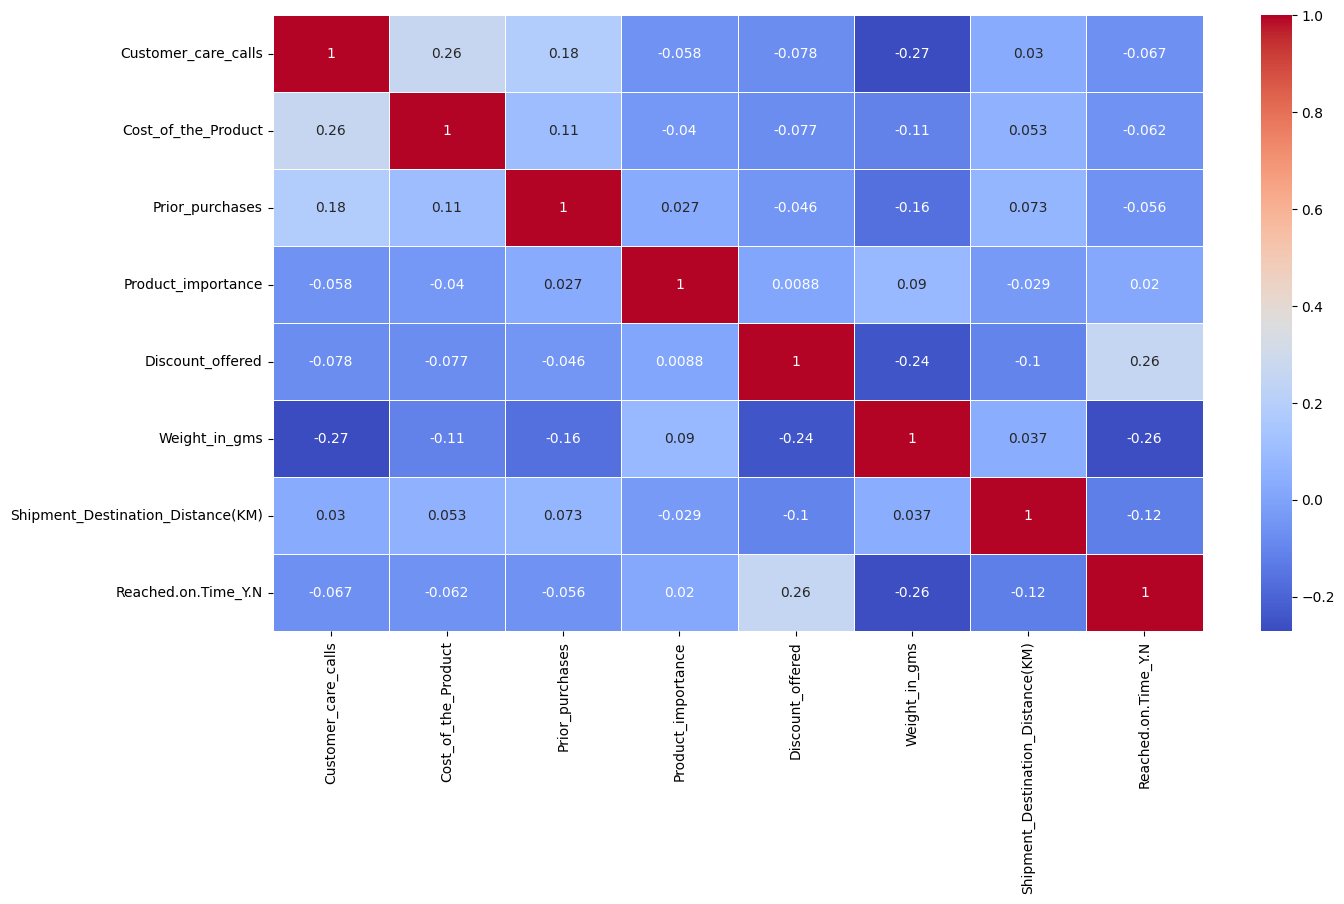

In [258]:
plt.figure(figsize=(15, 8))
sns.heatmap(df1.corr(), annot=True, linewidths=0.5, cmap='coolwarm')
plt.show()

In [259]:
df1.drop(['Shipment_Destination_Distance(KM)'], axis=1, inplace=True)
df1.head()

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,4,177,3,1,10,1233.0,1
1,4,216,2,1,10,3088.0,1
2,2,183,4,1,10,3374.0,1
3,3,176,4,2,10,1177.0,1
4,2,184,3,1,10,2484.0,1


In [260]:
df1.columns

Index(['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [261]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
x = df1.drop('Reached.on.Time_Y.N', axis='columns')
y = df1['Reached.on.Time_Y.N']

# List of columns to scale
cols_to_scale = ['Customer_care_calls','Cost_of_the_Product','Discount_offered','Product_importance','Prior_purchases','Weight_in_gms']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the selected columns
x[cols_to_scale] = scaler.fit_transform(x[cols_to_scale])

# Display the first two rows of the transformed dataframe
x.head(2)

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms
0,-0.047711,-0.562416,-0.372735,-0.942412,1.014243,-1.446043
1,-0.047711,0.089048,-1.029424,-0.942412,1.014243,-0.330848


In [262]:
y.head(2)

0    1
1    1
Name: Reached.on.Time_Y.N, dtype: int64

In [263]:
df1['Reached.on.Time_Y.N'].value_counts()

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64

In [264]:
x.describe()

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms
count,1.099900e+04,1.099900e+04,1.099900e+04,1.099900e+04,1.099900e+04,1.099900e+04
mean,2.325624e-16,4.651248e-17,-2.067221e-17,-5.943261e-17,4.134443e-17,-2.945790e-16
std,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00
min,-1.799887e+00,-1.915457e+00,-1.029424e+00,-9.424121e-01,-1.213325e+00,-1.585517e+00
25%,-9.237994e-01,-6.960501e-01,-3.727348e-01,-9.424121e-01,-1.213325e+00,-1.080824e+00
50%,-4.771132e-02,5.563917e-02,-3.727348e-01,6.165578e-01,-9.954083e-02,3.076077e-01
75%,8.283768e-01,6.736948e-01,2.839543e-01,6.165578e-01,1.014243e+00,8.492734e-01
max,2.580553e+00,5.025178e+01,4.224088e+00,2.175528e+00,1.014243e+00,1.884809e+01


In [265]:
x.columns

Index(['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Discount_offered', 'Weight_in_gms'],
      dtype='object')

### Model Training

In [266]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.20,random_state=10)

In [267]:
X_train.shape

(8799, 6)

In [268]:
Y_train.shape

(8799,)

In [269]:
X_test.shape

(2200, 6)

In [270]:
Y_test.shape

(2200,)

In [271]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score

In [272]:
##decision clasifier tree model
dtc = DecisionTreeClassifier(criterion='gini',max_depth=5,max_features=None,min_samples_leaf=1,min_samples_split=2)

In [273]:
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5)

In [274]:
y_pred_dtc=dtc.predict(X_test)
y_pred_dtc

array([0, 0, 0, ..., 1, 0, 1])

In [275]:
print(confusion_matrix(Y_test, y_pred_dtc))

[[850  45]
 [622 683]]


In [276]:
accuracy = accuracy_score(Y_test, y_pred_dtc)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_dtc))

Accuracy: 0.6968181818181818

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.95      0.72       895
           1       0.94      0.52      0.67      1305

    accuracy                           0.70      2200
   macro avg       0.76      0.74      0.70      2200
weighted avg       0.79      0.70      0.69      2200



In [277]:
print(precision_score(Y_test, y_pred_dtc))
print(recall_score(Y_test, y_pred_dtc))

0.9381868131868132
0.5233716475095785


In [278]:
##random forest clasifier model

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(
    bootstrap=True, 
    max_depth=10, 
    max_features='sqrt', 
    min_samples_leaf=4, 
    min_samples_split=2, 
    n_estimators=300, 
    random_state=42
)

In [279]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=300,
                       random_state=42)

In [280]:
y_pred_rfc=rfc.predict(X_test)
y_pred_rfc

array([0, 1, 0, ..., 1, 0, 1])

In [281]:
print(confusion_matrix(Y_test, y_pred_rfc))

[[738 157]
 [536 769]]


In [282]:
accuracy = accuracy_score(Y_test, y_pred_rfc)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_rfc))

Accuracy: 0.685

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.82      0.68       895
           1       0.83      0.59      0.69      1305

    accuracy                           0.69      2200
   macro avg       0.70      0.71      0.68      2200
weighted avg       0.73      0.69      0.69      2200



In [283]:
print(precision_score(Y_test, y_pred_rfc))
print(recall_score(Y_test, y_pred_rfc))

0.8304535637149028
0.589272030651341


In [284]:
##xg boost classifier model

from xgboost import XGBClassifier
xgc1 = XGBClassifier(
    colsample_bytree=1.0,
    learning_rate=0.01,
    max_depth=5,
    n_estimators=500,
    random_state=42  
)
xgc1.fit(X_train,Y_train)
y_pred_xgbc=xgc1.predict(X_test)
y_pred_xgbc


array([0, 1, 0, ..., 1, 0, 1])

In [285]:
accuracy_xgb1 = accuracy_score(Y_test, y_pred_xgbc)
print("Accuracy:", accuracy_xgb1)
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_xgbc))

Accuracy: 0.6927272727272727

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.86      0.69       895
           1       0.86      0.58      0.69      1305

    accuracy                           0.69      2200
   macro avg       0.72      0.72      0.69      2200
weighted avg       0.75      0.69      0.69      2200



In [286]:
print(precision_score(Y_test, y_pred_xgbc))
print(recall_score(Y_test, y_pred_xgbc))

0.8569807037457434
0.578544061302682


In [287]:
xgc2 = XGBClassifier(scale_pos_weight=3.8)  # Adjust scale_pos_weight for imbalance
xgc2.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [288]:
y_pred_xgbc1=xgc2.predict(X_test)
y_pred_xgbc1


array([1, 1, 1, ..., 1, 0, 1])

In [289]:
accuracy_xgbc1 = accuracy_score(Y_test,y_pred_xgbc1)
print("Accuracy:", accuracy_xgbc1)
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_xgbc1))

Accuracy: 0.6168181818181818

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.16      0.26       895
           1       0.62      0.93      0.74      1305

    accuracy                           0.62      2200
   macro avg       0.61      0.55      0.50      2200
weighted avg       0.61      0.62      0.54      2200



In [290]:
print(precision_score(Y_test, y_pred_xgbc1))
print(recall_score(Y_test, y_pred_xgbc1))

0.6178571428571429
0.9279693486590038
